In [ ]:
!pip install pingouin

In [ ]:
!pip install researchpy

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt 
import missingno as msno
from sklearn.cluster import KMeans
from collections import Counter
import pingouin as pg
from sklearn.decomposition import PCA
import researchpy as rp

In [ ]:
df = pd.read_csv('/content/Psy_Exp_12062022.csv')
df.shape

(67, 115)

## 去除沒用的data

In [ ]:
df = df[df.name != '賴溡雨']

In [ ]:
df = df[df.d != '''請撰寫一個段落以向團體中的其他人介紹您自己，
寫一些您想要述說的 — 任何您想分享的事情。 請撰寫一個段落以向團體中的其他人介紹您自己，
寫一些您想要述說的 — 任何您想分享的事情。 請撰寫一個段落以向團體中的其他人介紹您自己，
寫一些您想要述說的 — 任何您想分享的事情。 ''']

In [ ]:
df = df[df['在實驗過程中，您是否能夠閱讀其他參與者的描述並查看其頭像？'] == '是']

In [ ]:
df = df[df.name != 'wen'] #c= ostracism, 覺得自己likes高過平均

In [ ]:
df.shape

(61, 115)

## 對於anxiety進行處理

In [ ]:
df_anxiety = df[['1f', '1a', '2f', '2a', '3f', '3a',
       '4f', '4a', '5f', '5a', '6f', '6a', '7f', '7a', '8f', '8a', '9f', '9a',
       '10f', '10a', '11f', '11a', '12f', '12a', '13f', '13a', '14f', '14a',
       '15f', '15a', '16f', '16a', '17f', '17a', '18f', '18a', '19f', '19a',
       '20f', '20a', '21f', '21a', '22f', '22a', '23f', '23a', '24f', '24a']]

In [ ]:
for i in df_anxiety.columns:
  df_anxiety[i] = df_anxiety[i].replace({'undefined':np.nan})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


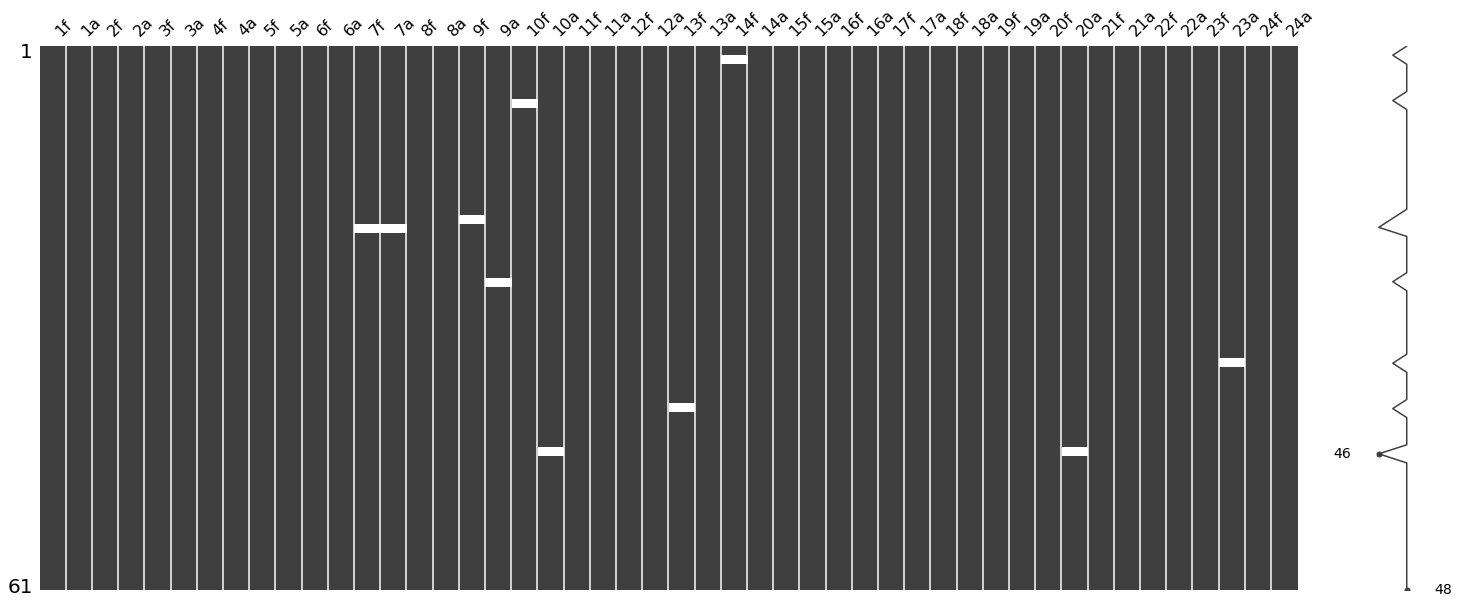

In [ ]:
msno.matrix(df_anxiety)

### LSAS Alpha

In [ ]:
pg.cronbach_alpha(data=df_anxiety.dropna().astype(int))

(0.929166345286154, array([0.899, 0.954]))

In [ ]:
df['soc_anxiety'] = df_anxiety.sum(axis = 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
fig = px.histogram(df_anxiety, x=df_anxiety.sum(axis = 1), nbins=20)
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
x_cluster = df_anxiety.sum(axis = 1).to_numpy().reshape(-1, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



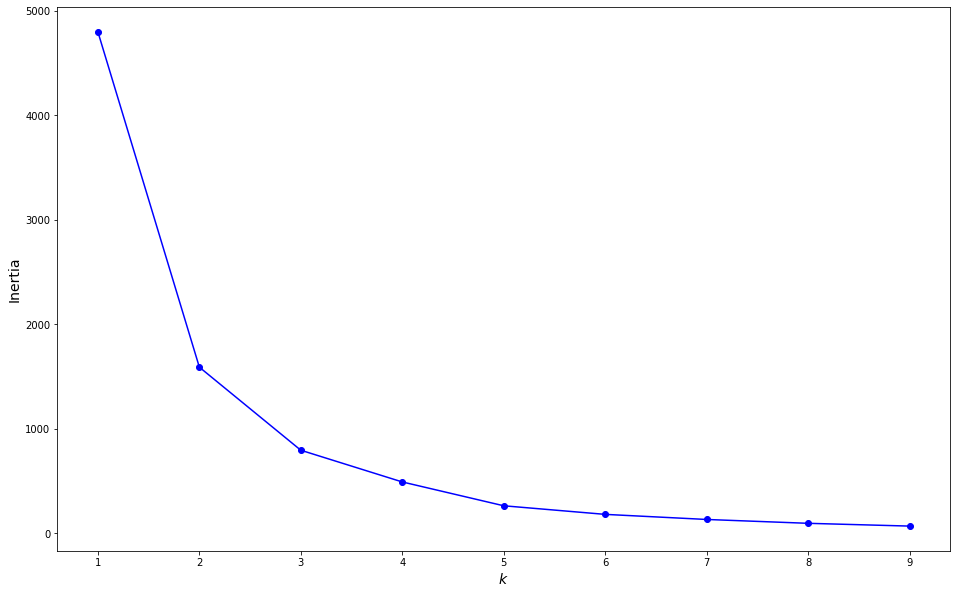

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(x_cluster)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(16, 10))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

In [ ]:
k = 2
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(x_cluster)

In [ ]:
kmeans.cluster_centers_

array([[14.40625],
       [28.8    ]])

In [ ]:
14.4 + (28.8-14.4)/2

21.6

In [ ]:
anxiety_high_low = []
for i in df['soc_anxiety']:
  if i > 21.6:
    anxiety_high_low.append(1)
  else:
    anxiety_high_low.append(0)

df['anxiety_high_low'] = anxiety_high_low

In [ ]:
df['anxiety_high_low'].sum()

29

In [ ]:
pd.crosstab(df.anxiety_high_low, df.c, margins=True)

c,1,2,All
anxiety_high_low,,,
0,15,17,32
1,10,19,29
All,25,36,61


In [ ]:
anxiety_lsas = []
for i in df['soc_anxiety']:
  if i >= 30:
    anxiety_lsas.append(1)
  else:
    anxiety_lsas.append(0)

df['anxiety_lsas'] = anxiety_lsas

In [ ]:
df['anxiety_lsas'].sum()

11

In [ ]:
pd.crosstab(df.anxiety_lsas, df.c, margins=True)

c,1,2,All
anxiety_lsas,,,
0,22,28,50
1,3,8,11
All,25,36,61


## 情境内化

In [ ]:
df['考量到在介紹任務中有一些平均「likes」數(例如5個左右)，您對於自己所接收到「likes」數是怎麼想的？'].astype('category').cat.categories

Index(['低於平均數', '約為平均數', '高於平均數'], dtype='object')

In [ ]:
for i in ['在接下來的問題中，請選擇最能代表在介紹過程中您所體驗到的想法的數量 - 我被忽視了', 
          '在接下來的問題中，請選擇最能代表在介紹過程中您所體驗到的想法的數量 - 我被排擠了',
          '在接下來的問題中，請選擇最能代表在介紹過程中您所體驗到的想法的數量 - 其他人喜歡我的描述']:
  df[i] = df[i].replace({'一點也不':1, '非常':5}).astype(int)

In [ ]:
df_internal = df[['考量到在介紹任務中有一些平均「likes」數(例如5個左右)，您對於自己所接收到「likes」數是怎麼想的？',
                    '在接下來的問題中，請選擇最能代表在介紹過程中您所體驗到的想法的數量 - 我被忽視了', 
                    '在接下來的問題中，請選擇最能代表在介紹過程中您所體驗到的想法的數量 - 我被排擠了',
                    '在接下來的問題中，請選擇最能代表在介紹過程中您所體驗到的想法的數量 - 其他人喜歡我的描述',
                  'c']]

In [ ]:
df_internal_ostra = df[df_internal['c']== 1]
df_internal_inclu = df[df_internal['c']== 2]

### 不同Condition的t-test

In [ ]:
internalization = [
 '在接下來的問題中，請選擇最能代表在介紹過程中您所體驗到的想法的數量 - 我被忽視了', 
 '在接下來的問題中，請選擇最能代表在介紹過程中您所體驗到的想法的數量 - 我被排擠了',
 '在接下來的問題中，請選擇最能代表在介紹過程中您所體驗到的想法的數量 - 其他人喜歡我的描述']

for i in internalization:
  print(i)
  summary, results = rp.ttest(group1= df_internal_ostra[i], group1_name= "Ostracism",
                              group2= df_internal_inclu[i], group2_name= "Inclusion")
  print(results)
  print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')


在接下來的問題中，請選擇最能代表在介紹過程中您所體驗到的想法的數量 - 我被忽視了
                      Independent t-test  results
0  Difference (Ostracism - Inclusion) =    1.1989
1                  Degrees of freedom =   59.0000
2                                   t =    4.9792
3               Two side test p value =    0.0000
4              Difference < 0 p value =    1.0000
5              Difference > 0 p value =    0.0000
6                           Cohen's d =    1.2963
7                           Hedge's g =    1.2798
8                       Glass's delta =    0.9508
9                         Pearson's r =    0.5440
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
在接下來的問題中，請選擇最能代表在介紹過程中您所體驗到的想法的數量 - 我被排擠了
                      Independent t-test  results
0  Difference (Ostracism - Inclusion) =    0.5867
1                  Degrees of freedom =   59.0000
2                                   t =    3.0675
3               Two side test p value =    0.0033
4              Difference < 0 p value =    0.9984
5              Difference > 0 p va

In [ ]:
df_c1_ostracism[df_c1_ostracism['考量到在介紹任務中有一些平均「likes」數(例如5個左右)，您對於自己所接收到「likes」數是怎麼想的？']=='高於平均數']['name']

1    wen
Name: name, dtype: object

In [ ]:
pd.crosstab(df['考量到在介紹任務中有一些平均「likes」數(例如5個左右)，您對於自己所接收到「likes」數是怎麼想的？'], df.c, margins=True)
# 那個 1 的要去除

c,1,2,All
考量到在介紹任務中有一些平均「likes」數(例如5個左右)，您對於自己所接收到「likes」數是怎麼想的？,,,
低於平均數,23,0,23
約為平均數,2,30,32
高於平均數,1,6,7
All,26,36,62


In [ ]:
pd.crosstab(df['在接下來的問題中，請選擇最能代表在介紹過程中您所體驗到的想法的數量 - 我被忽視了'], df.c, margins=True)

c,1,2,All
在接下來的問題中，請選擇最能代表在介紹過程中您所體驗到的想法的數量 - 我被忽視了,,,
1,7,25,32
2,5,9,14
3,6,2,8
4,6,0,6
5,1,0,1
All,25,36,61


In [ ]:
pd.crosstab(df['在接下來的問題中，請選擇最能代表在介紹過程中您所體驗到的想法的數量 - 我被排擠了'], df.c, margins=True)

c,1,2,All
在接下來的問題中，請選擇最能代表在介紹過程中您所體驗到的想法的數量 - 我被排擠了,,,
1,11,25,36
2,6,10,16
3,7,1,8
4,1,0,1
All,25,36,61


In [ ]:
pd.crosstab(df['在接下來的問題中，請選擇最能代表在介紹過程中您所體驗到的想法的數量 - 其他人喜歡我的描述'], df.c, margins=True)

c,1,2,All
在接下來的問題中，請選擇最能代表在介紹過程中您所體驗到的想法的數量 - 其他人喜歡我的描述,,,
1,2,2,4
2,9,1,10
3,13,11,24
4,0,17,17
5,1,5,6
All,25,36,61


## 處理實驗后心理變化

### 歸屬感 (分數越高越有歸屬感)

In [ ]:
df_exclude = df[['請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我感到「脫節」',
'請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我覺得被拒絕',
'請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我覺得自己像個局外人',
'請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我覺得我屬於這個團體',
'請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我覺得團體中的其他人將會和我有很多互動']]

In [ ]:
for i in df_exclude.columns:
  df_exclude[i] = df_exclude[i].replace({'一點也不':1, '非常':5}).astype(int)

In [ ]:
reverse = ['請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我感到「脫節」',
'請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我覺得被拒絕',
'請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我覺得自己像個局外人']
for i in reverse:
  df_exclude[i] = 6 - df_exclude[i]

### Belonging alpha

In [ ]:
pg.cronbach_alpha(data=df_exclude.astype(int))

(0.8556101344364011, array([0.789, 0.906]))

In [ ]:
df_exclude.describe()

,請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我感到「脫節」,請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我覺得被拒絕,請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我覺得自己像個局外人,請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我覺得我bu屬於這個團體,請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我覺得團體中的其他人將不會和我有很多互動
count,61.000000,61.000000,61.000000,61.000000,61.000000
mean,2.114754,1.655738,2.098361,3.180328,3.065574
std,1.239602,1.014647,1.274165,1.056854,1.167174
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,2.000000
50%,2.000000,1.000000,2.000000,3.000000,3.000000
75%,3.000000,2.000000,3.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
df_exclude.corr()

,請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我感到「脫節」,請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我覺得被拒絕,請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我覺得自己像個局外人,請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我覺得我bu屬於這個團體,請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我覺得團體中的其他人將不會和我有很多互動
請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我感到「脫節」,1.000000,0.720990,0.741937,0.429207,0.547645
請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我覺得被拒絕,0.720990,1.000000,0.684102,0.245367,0.328994
請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我覺得自己像個局外人,0.741937,0.684102,1.000000,0.444550,0.555938
請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我覺得我bu屬於這個團體,0.429207,0.245367,0.444550,1.000000,0.679332
請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我覺得團體中的其他人將不會和我有很多互動,0.547645,0.328994,0.555938,0.679332,1.000000


In [ ]:
df['exclude'] = df_exclude.sum(axis = 1)/5

In [ ]:
df['exclude'].describe()

count    61.000000
mean      3.577049
std       0.919491
min       1.000000
25%       3.000000
50%       3.800000
75%       4.200000
max       5.000000
Name: exclude, dtype: float64

In [ ]:
#pca = PCA(n_components=1)
#df['exclude'] = pca.fit_transform(df_exclude[['請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我感到「脫節」',
#'請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我覺得被拒絕',
#'請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我覺得自己像個局外人',
#'請使用量表，在每一項陳述標明您在介紹過程中所體驗到的感受 - 我覺得團體中的其他人將不會和我有很多互動']])
#pca.explained_variance_ratio_

In [ ]:
fig = px.scatter(x=df.soc_anxiety, y=df.exclude, color = df.c.astype('category'), trendline = 'ols')
fig.show()

### 自尊

In [ ]:
df_esteem = df[['Nsest1 - 我對自己的感覺良好',
'Nsest1 - 我的自尊是高的',
'Nsest1 - 我覺得被喜愛',
'Nsest1 - 我覺得不安全',
'Nsest1 - 我覺得滿意']]

In [ ]:
for i in df_esteem.columns:
  df_esteem[i] = df_esteem[i].replace({'一點也不':1, '非常':5}).astype(int)

In [ ]:
df_esteem['Nsest1 - 我覺得安全']  = 6 - df_esteem['Nsest1 - 我覺得不安全']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_esteem[['Nsest1 - 我對自己的感覺良好',
'Nsest1 - 我的自尊是高的',
'Nsest1 - 我覺得被喜愛',
'Nsest1 - 我覺得安全',
'Nsest1 - 我覺得滿意']].corr()

,Nsest1 - 我對自己的感覺良好,Nsest1 - 我的自尊是高的,Nsest1 - 我覺得被喜愛,Nsest1 - 我覺得安全,Nsest1 - 我覺得滿意
Nsest1 - 我對自己的感覺良好,1.000000,0.432126,0.437608,0.320148,0.386663
Nsest1 - 我的自尊是高的,0.432126,1.000000,0.277015,-0.139121,0.003652
Nsest1 - 我覺得被喜愛,0.437608,0.277015,1.000000,0.391431,0.685230
Nsest1 - 我覺得安全,0.320148,-0.139121,0.391431,1.000000,0.571110
Nsest1 - 我覺得滿意,0.386663,0.003652,0.685230,0.571110,1.000000


### Self-esteem alpha

In [ ]:
pg.cronbach_alpha(data=df_esteem[['Nsest1 - 我對自己的感覺良好',
'Nsest1 - 我的自尊是高的',
'Nsest1 - 我覺得被喜愛',
'Nsest1 - 我覺得安全',
'Nsest1 - 我覺得滿意']].astype(int))

(0.7203306757286626, array([0.592, 0.818]))

In [ ]:
df['esteem'] = df_esteem[['Nsest1 - 我對自己的感覺良好',
'Nsest1 - 我的自尊是高的',
'Nsest1 - 我覺得被喜愛',
'Nsest1 - 我覺得安全',
'Nsest1 - 我覺得滿意']].sum(axis = 1)/5

In [ ]:
#pca = PCA(n_components=1)
#df['esteem'] = pca.fit_transform(df_esteem[['Nsest1 - 我對自己的感覺良好',
#'Nsest1 - 我的自尊是高的',
#'Nsest1 - 我覺得被喜愛']])

In [ ]:
pca.explained_variance_ratio_

array([0.5959834])

In [ ]:
fig = px.scatter(x=df.soc_anxiety, y=df.esteem, color = df.c.astype('category'), trendline = 'ols')
fig.show()

### 存在感

In [ ]:
df_exist = df[['Nmexist1 - 我覺得自己隱形了',
'Nmexist1 - 我覺得毫無意義',
'Nmexist1 - 我感到自己沒有存在感',
'Nmexist1 - 我覺得自己是重要的',
'Nmexist1 - 我覺得自己是有用的',]]

In [ ]:
for i in df_exist.columns:
  df_exist[i] = df_exist[i].replace({'一點也不':1, '非常':5}).astype(int)

In [ ]:
reverse = ['Nmexist1 - 我覺得自己隱形了',
'Nmexist1 - 我覺得毫無意義',
'Nmexist1 - 我感到自己沒有存在感']
for i in reverse:
  df_exist[i] = 6 - df_exist[i]

### Meaningful Existence alpha

In [ ]:
pg.cronbach_alpha(data=df_exist.astype(int))

(0.8196979232221524, array([0.737, 0.882]))

In [ ]:
df_exist.corr()

,Nmexist1 - 我覺得自己隱形了,Nmexist1 - 我覺得毫無意義,Nmexist1 - 我感到自己沒有存在感,Nmexist1 - 我覺得自己是重要的,Nmexist1 - 我覺得自己是有用的
Nmexist1 - 我覺得自己隱形了,1.000000,0.596492,0.755860,0.385670,0.165503
Nmexist1 - 我覺得毫無意義,0.596492,1.000000,0.684242,0.312973,0.195535
Nmexist1 - 我感到自己沒有存在感,0.755860,0.684242,1.000000,0.538530,0.314140
Nmexist1 - 我覺得自己是重要的,0.385670,0.312973,0.538530,1.000000,0.804497
Nmexist1 - 我覺得自己是有用的,0.165503,0.195535,0.314140,0.804497,1.000000


In [ ]:
df['exist'] = df_exist.sum(axis = 1)/5

In [ ]:
#pca = PCA(n_components=1)
#df['exist'] = pca.fit_transform(df_exist[['Nmexist1 - 我覺得自己隱形了',
#'Nmexist1 - 我覺得毫無意義',
#'Nmexist1 - 我感到自己沒有存在感',
#'Nmexist1 - 我覺得自己是重要的',
#]])

#pca.explained_variance_ratio_

array([0.67521456])

In [ ]:
fig = px.scatter(x=df.soc_anxiety, y=df.exist, color = df.c.astype('category'), trendline = 'ols')
fig.show()

### 控制感

In [ ]:
df_ctrl = df[['Nctrl1 - 我覺得強大',
'Nctrl1 - 我覺得我可以控制互動的過程',
'Nctrl1 - 我覺得我有能力顯著改變事情',
'Nctrl1 - 我覺得我無法影響他人的行動',
'Nctrl1 - 我覺得團體中的其他人決定了所有事情']]

In [ ]:
for i in df_ctrl.columns:
  df_ctrl[i] = df_ctrl[i].replace({'一點也不':1, '非常':5}).astype(int)

In [ ]:
df_ctrl['Nctrl1 - 我覺得我可以影響他人的行動']  = 6 - df_ctrl['Nctrl1 - 我覺得我無法影響他人的行動']
df_ctrl['Nctrl1 - 我不覺得團體中的其他人決定了所有事情']  = 6 - df_ctrl['Nctrl1 - 我覺得團體中的其他人決定了所有事情']

In [ ]:
pg.cronbach_alpha(data=df_ctrl[[
'Nctrl1 - 我覺得我可以控制互動的過程',
'Nctrl1 - 我覺得我有能力顯著改變事情',
'Nctrl1 - 我覺得強大',
'Nctrl1 - 我覺得我可以影響他人的行動',
'Nctrl1 - 我不覺得團體中的其他人決定了所有事情']].astype(int))

(0.7980667922480125, array([0.705, 0.868]))

In [ ]:
df_ctrl[[
'Nctrl1 - 我覺得我可以控制互動的過程',
'Nctrl1 - 我覺得我有能力顯著改變事情',
'Nctrl1 - 我覺得強大',
'Nctrl1 - 我覺得我可以影響他人的行動',
'Nctrl1 - 我不覺得團體中的其他人決定了所有事情']].corr()

,Nctrl1 - 我覺得我可以控制互動的過程,Nctrl1 - 我覺得我有能力顯著改變事情,Nctrl1 - 我覺得強大,Nctrl1 - 我覺得我可以影響他人的行動,Nctrl1 - 我不覺得團體中的其他人決定了所有事情
Nctrl1 - 我覺得我可以控制互動的過程,1.000000,0.760125,0.608326,0.423638,0.262394
Nctrl1 - 我覺得我有能力顯著改變事情,0.760125,1.000000,0.740684,0.448045,0.179973
Nctrl1 - 我覺得強大,0.608326,0.740684,1.000000,0.283277,0.253188
Nctrl1 - 我覺得我可以影響他人的行動,0.423638,0.448045,0.283277,1.000000,0.353034
Nctrl1 - 我不覺得團體中的其他人決定了所有事情,0.262394,0.179973,0.253188,0.353034,1.000000


In [ ]:
#pca = PCA(n_components=1)
#df['ctrl'] = pca.fit_transform(df_ctrl[['Nctrl1 - 我覺得我可以控制互動的過程',
#'Nctrl1 - 我覺得我有能力顯著改變事情',
#'Nctrl1 - 我覺得強大',
#'Nctrl1 - 我覺得我可以影響他人的行動',
#]])

#pca.explained_variance_ratio_

array([0.67947871])

In [ ]:
df['ctrl'] = df_ctrl[[
'Nctrl1 - 我覺得我可以控制互動的過程',
'Nctrl1 - 我覺得我有能力顯著改變事情',
'Nctrl1 - 我覺得強大',
'Nctrl1 - 我覺得我可以影響他人的行動',
'Nctrl1 - 我不覺得團體中的其他人決定了所有事情']].sum(axis = 1)/5

In [ ]:
fig = px.scatter(x=df.soc_anxiety, y=df.ctrl, color = df.c.astype('category'), trendline = 'ols')
fig.show()

### 心情

In [ ]:
for i in df[['心情 - 好',
'心情 - 壞',
'心情 - 友善的',
'心情 - 不友善的',
'心情 - 生氣的',
'心情 - 愉悅的',
'心情 - 快樂的',
'心情 - 難過的']].columns:
  df[i] = df[i].replace({'一點也不':1, '非常':5}).astype(int)

In [ ]:
df[['心情 - 好',
'心情 - 壞',
'心情 - 友善的',
'心情 - 不友善的',
'心情 - 生氣的',
'心情 - 愉悅的',
'心情 - 快樂的',
'心情 - 難過的']].corr()

,心情 - 好,心情 - 壞,心情 - 友善的,心情 - 不友善的,心情 - 生氣的,心情 - 愉悅的,心情 - 快樂的,心情 - 難過的
心情 - 好,1.000000,-0.697635,0.686114,-0.528714,-0.380519,0.776196,0.742877,-0.538959
心情 - 壞,-0.697635,1.000000,-0.556039,0.810371,0.689775,-0.662733,-0.586299,0.778265
心情 - 友善的,0.686114,-0.556039,1.000000,-0.602541,-0.365152,0.781104,0.742360,-0.379590
心情 - 不友善的,-0.528714,0.810371,-0.602541,1.000000,0.748202,-0.527930,-0.528906,0.672622
心情 - 生氣的,-0.380519,0.689775,-0.365152,0.748202,1.000000,-0.410246,-0.294862,0.737785
心情 - 愉悅的,0.776196,-0.662733,0.781104,-0.527930,-0.410246,1.000000,0.827334,-0.474344
心情 - 快樂的,0.742877,-0.586299,0.742360,-0.528906,-0.294862,0.827334,1.000000,-0.355236
心情 - 難過的,-0.538959,0.778265,-0.379590,0.672622,0.737785,-0.474344,-0.355236,1.000000


In [ ]:
fig = px.scatter(x=df.soc_anxiety, y=df['心情 - 好'], color = df.c.astype('category'), trendline = 'ols')
fig.show()

In [ ]:
fig = px.scatter(x=df.soc_anxiety, y=df['心情 - 壞'], color = df.c.astype('category'), trendline = 'ols')
fig.show()

In [ ]:
fig = px.scatter(x=df.soc_anxiety, y=df['心情 - 友善的'], color = df.c.astype('category'), trendline = 'ols')
fig.show()

In [ ]:
fig = px.scatter(x=df.soc_anxiety, y=df['心情 - 不友善的'], color = df.c.astype('category'), trendline = 'ols')
fig.show()

In [ ]:
fig = px.scatter(x=df.soc_anxiety, y=df['心情 - 生氣的'], color = df.c.astype('category'), trendline = 'ols')
fig.show()

In [ ]:
fig = px.scatter(x=df.soc_anxiety, y=df['心情 - 愉悅的'], color = df.c.astype('category'), trendline = 'ols')
fig.show()

In [ ]:
fig = px.scatter(x=df.soc_anxiety, y=df['心情 - 快樂的'], color = df.c.astype('category'), trendline = 'ols')
fig.show()

In [ ]:
fig = px.scatter(x=df.soc_anxiety, y=df['心情 - 難過的'], color = df.c.astype('category'), trendline = 'ols')
fig.show()

In [ ]:
df.shape

(61, 122)

In [ ]:
df.to_csv('psy_exp_cleansed_v3.csv')

# 模型（PyMC3）

In [ ]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import theano
import xarray as xr

import statsmodels.api as sm

import plotly.graph_objects as go

print(f"Running on PyMC3 v{pm.__version__}")

In [ ]:
df = pd.read_csv('/content/psy_exp_cleansed_v3.csv')

In [ ]:
df['c'] = df['c'] - 1

In [ ]:
df.columns

Index(['Unnamed: 0', 'Start Date', 'End Date', 'Response Type', 'IP Address',
       'Progress', 'Duration (in seconds)', 'Finished', 'Recorded Date',
       'Response ID',
       ...
       'avtime', 'clnum', 'cl', 'soc_anxiety', 'anxiety_high_low',
       'anxiety_lsas', 'exclude', 'esteem', 'exist', 'ctrl'],
      dtype='object', length=123)

In [ ]:
df_exp = df[['c','anxiety_high_low',
       'anxiety_lsas', 'exclude', 'esteem', 'exist', 'ctrl', '心情 - 好',
'心情 - 壞',
'心情 - 友善的',
'心情 - 不友善的',
'心情 - 生氣的',
'心情 - 愉悅的',
'心情 - 快樂的',
'心情 - 難過的']]

In [ ]:
df_exp

,c,anxiety_high_low,anxiety_lsas,exclude,esteem,exist,ctrl,心情 - 好,心情 - 壞,心情 - 友善的,心情 - 不友善的,心情 - 生氣的,心情 - 愉悅的,心情 - 快樂的,心情 - 難過的
0,1,0,0,4.4,4.8,5.0,4.4,4,1,5,1,1,5,5,3
1,1,0,0,2.2,3.0,3.2,2.6,4,2,4,2,2,3,3,2
2,1,1,0,4.6,3.0,3.0,2.4,4,2,4,2,3,4,4,2
3,1,0,0,4.6,4.2,4.6,3.2,5,1,5,1,1,5,5,1
4,1,0,0,4.2,3.4,3.4,2.0,3,1,3,1,1,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0,0,0,3.6,3.6,4.0,3.0,4,3,4,2,2,3,3,2
57,1,1,0,4.2,3.8,4.4,2.4,4,1,4,1,1,4,4,1
58,1,1,0,3.4,3.2,3.6,2.0,4,2,4,3,2,4,4,1
59,1,1,0,3.8,3.6,3.4,2.6,3,3,4,2,1,3,3,2


In [ ]:
df[['exclude', 'esteem', 'exist', 'ctrl']].corr()

,exclude,esteem,exist,ctrl
exclude,1.000000,0.578594,0.695243,0.473201
esteem,0.578594,1.000000,0.817505,0.624242
exist,0.695243,0.817505,1.000000,0.660563
ctrl,0.473201,0.624242,0.660563,1.000000


In [ ]:
df_exp.describe().round(3)

,c,anxiety_high_low,anxiety_lsas,exclude,esteem,exist,ctrl,心情 - 好,心情 - 壞,心情 - 友善的,心情 - 不友善的,心情 - 生氣的,心情 - 愉悅的,心情 - 快樂的,心情 - 難過的
count,61.000,61.000,61.000,61.000,61.000,61.000,61.000,61.000,61.000,61.000,61.000,61.000,61.000,61.000,61.000
mean,0.590,0.475,0.180,3.577,3.321,3.544,2.915,3.443,2.164,3.721,1.820,1.607,3.393,3.295,1.852
std,0.496,0.504,0.388,0.919,0.708,0.894,0.827,0.807,1.019,0.859,0.904,0.781,0.862,0.863,0.997
min,0.000,0.000,0.000,1.000,1.800,1.000,1.400,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
25%,0.000,0.000,0.000,3.000,3.000,3.000,2.400,3.000,1.000,3.000,1.000,1.000,3.000,3.000,1.000
50%,1.000,0.000,0.000,3.800,3.400,3.600,2.800,4.000,2.000,4.000,2.000,1.000,3.000,3.000,2.000
75%,1.000,1.000,0.000,4.200,3.800,4.400,3.600,4.000,3.000,4.000,3.000,2.000,4.000,4.000,3.000
max,1.000,1.000,1.000,5.000,5.000,5.000,4.800,5.000,5.000,5.000,4.000,3.000,5.000,5.000,4.000


In [ ]:
df_exp["exclude"] = df_exp["exclude"].astype(theano.config.floatX)
df_exp["esteem"] = df_exp["esteem"].astype(theano.config.floatX)
df_exp["exist"] = df_exp["exist"].astype(theano.config.floatX)
df_exp["ctrl"] = df_exp["ctrl"].astype(theano.config.floatX)
df_exp["心情 - 好"] = df_exp["心情 - 好"].astype(theano.config.floatX)
df_exp["心情 - 壞"] = df_exp["心情 - 壞"].astype(theano.config.floatX)
df_exp["心情 - 友善的"] = df_exp["心情 - 友善的"].astype(theano.config.floatX)
df_exp["心情 - 不友善的"] = df_exp["心情 - 不友善的"].astype(theano.config.floatX)
df_exp["心情 - 生氣的"] = df_exp["心情 - 生氣的"].astype(theano.config.floatX)
df_exp["心情 - 愉悅的"] = df_exp["心情 - 愉悅的"].astype(theano.config.floatX)
df_exp["心情 - 快樂的"] = df_exp["心情 - 快樂的"].astype(theano.config.floatX)
df_exp["心情 - 難過的"] = df_exp["心情 - 難過的"].astype(theano.config.floatX)

## Frequentist GLM & Non-inforrmative BANOVA

In [ ]:
df_exp.columns

Index(['c', 'anxiety_high_low', 'anxiety_lsas', 'exclude', 'esteem', 'exist',
       'ctrl', '心情 - 好', '心情 - 壞', '心情 - 友善的', '心情 - 不友善的', '心情 - 生氣的',
       '心情 - 愉悅的', '心情 - 快樂的', '心情 - 難過的'],
      dtype='object')

In [ ]:
dpd_var = ['exclude', 'esteem', 'exist',
       'ctrl', '心情 - 好', '心情 - 壞', '心情 - 友善的', '心情 - 不友善的', '心情 - 生氣的',
       '心情 - 愉悅的', '心情 - 快樂的', '心情 - 難過的']

In [ ]:
for i in dpd_var:
  print(i)
  print('\n\n')
  Y = df_exp[i]
  X = df_exp[['anxiety_lsas', 'c']]
  X = sm.add_constant(X)
  model = sm.OLS(Y,X).fit()
  print(model.summary())
  print('\n\n')
  print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')

exclude



                            OLS Regression Results                            
Dep. Variable:                exclude   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     5.625
Date:                Mon, 13 Jun 2022   Prob (F-statistic):            0.00585
Time:                        16:37:20   Log-Likelihood:                -75.524
No. Observations:                  61   AIC:                             157.0
Df Residuals:                      58   BIC:                             163.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.1370      0.175   

In [ ]:
# with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
#    # Define priors
#    sigma = pm.HalfCauchy('sigma', beta=0.25)
#    soc_anxiety = pm.Uniform('Social_Anxiety', -2, 2)
#    condition = pm.Uniform('Condition', -2, 2)

    # Define likelihood
#    likelihood = pm.Normal('Score', 
#                           mu = soc_anxiety*df_exp['anxiety_lsas'] + condition*df_exp['c'],
#                           sd=sigma, 
#                           observed=df_exp.exclude)

In [ ]:
# with model:
    # Inference!
#    trace = pm.sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Condition, Social_Anxiety, sigma]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 9 seconds.
The acceptance probability does not match the target. It is 0.8861537646920687, but should be close to 0.8. Try to increase the number of tuning steps.


In [ ]:
# df_summary = pm.summary(trace)
# df_summary

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.



,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,1.936,0.183,1.596,2.264,0.003,0.002,4766.0,4067.0,1.0
Social_Anxiety,0.415,0.622,-0.749,1.591,0.010,0.009,3780.0,2573.0,1.0
Condition,-0.775,0.348,-1.440,-0.142,0.005,0.004,4053.0,3300.0,1.0


## Bayesian GLM

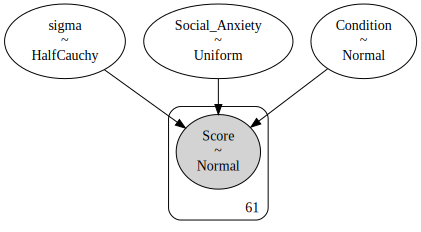

In [ ]:
pm.model_to_graphviz(model)

### Belonging

In [ ]:
with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = pm.HalfCauchy('sigma', beta=0.25)
    soc_anxiety = pm.Uniform('Social_Anxiety', -0.5, 0.1)
    condition = pm.Normal('Condition', mu = 0.8, sd=0.06)

    # Define likelihood
    likelihood = pm.Normal('Score', 
                           mu = soc_anxiety*df_exp['anxiety_lsas'] + condition*df_exp['c'],
                           sd=sigma, 
                           observed=df_exp.exclude)

with model:
    # Inference!
    trace = pm.sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning:

In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Condition, Social_Anxiety, sigma]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 8 seconds.


In [ ]:
df_summary = pm.summary(trace)
df_summary

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.



,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Condition,0.840,0.061,0.725,0.950,0.001,0.001,6450.0,4147.0,1.0
sigma,3.240,0.307,2.696,3.816,0.004,0.003,6286.0,4406.0,1.0
Social_Anxiety,-0.182,0.134,-0.431,-0.000,0.002,0.001,5357.0,4172.0,1.0


In [ ]:
df_exp.columns

Index(['c', 'anxiety_high_low', 'anxiety_lsas', 'exclude', 'esteem', 'exist',
       'ctrl', '心情 - 好', '心情 - 壞', '心情 - 友善的', '心情 - 不友善的', '心情 - 生氣的',
       '心情 - 愉悅的', '心情 - 快樂的', '心情 - 難過的'],
      dtype='object')

### Self-esteem

In [ ]:
with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = pm.HalfCauchy('sigma', beta=0.25)
    soc_anxiety = pm.Uniform('Social_Anxiety', -0.5, 0.1)
    condition = pm.Normal('Condition', mu = 0.73, sd=0.06)

    # Define likelihood
    likelihood = pm.Normal('Score', 
                           mu = soc_anxiety*df_exp['anxiety_lsas'] + condition*df_exp['c'],
                           sd=sigma, 
                           observed=df_exp.esteem)

with model:
    # Inference!
    trace = pm.sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

df_summary = pm.summary(trace)
df_summary

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning:

In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Condition, Social_Anxiety, sigma]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 12 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.



,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Condition,0.770,0.061,0.656,0.882,0.001,0.001,6300.0,4289.0,1.0
sigma,2.988,0.281,2.495,3.521,0.003,0.002,7111.0,4155.0,1.0
Social_Anxiety,-0.104,0.156,-0.396,0.100,0.002,0.002,6107.0,4025.0,1.0


### Meaningful Existence

In [ ]:
with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = pm.HalfCauchy('sigma', beta=0.25)
    soc_anxiety = pm.Uniform('Social_Anxiety', -0.5, 0.1)
    condition = pm.Normal('Condition', mu = 0.5, sd=0.06)

    # Define likelihood
    likelihood = pm.Normal('Score', 
                           mu = soc_anxiety*df_exp['anxiety_lsas'] + condition*df_exp['c'],
                           sd=sigma, 
                           observed=df_exp.exist)

with model:
    # Inference!
    trace = pm.sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

df_summary = pm.summary(trace)
df_summary

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning:

In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Condition, Social_Anxiety, sigma]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 13 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning:

Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.



,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Condition,0.536,0.060,0.420,0.643,0.001,0.001,6965.0,4345.0,1.0
sigma,3.377,0.314,2.802,3.964,0.004,0.003,7902.0,4625.0,1.0
Social_Anxiety,-0.117,0.161,-0.413,0.100,0.002,0.002,6292.0,3895.0,1.0


### Control

In [ ]:
with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = pm.HalfCauchy('sigma', beta=0.25)
    soc_anxiety = pm.Uniform('Social_Anxiety', -0.5, 0.1)
    condition = pm.Normal('Condition', mu = 0.05, sd=0.06)

    # Define likelihood
    likelihood = pm.Normal('Score', 
                           mu = soc_anxiety*df_exp['anxiety_lsas'] + condition*df_exp['c'],
                           sd=sigma, 
                           observed=df_exp.ctrl)

with model:
    # Inference!
    trace = pm.sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

df_summary = pm.summary(trace)
df_summary

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  from ipykernel import kernelapp as app
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Condition, Social_Anxiety, sigma]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 10 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Condition,0.092,0.061,-0.025,0.205,0.001,0.001,6171.0,4061.0,1.0
sigma,3.008,0.289,2.485,3.547,0.003,0.002,7451.0,4328.0,1.0
Social_Anxiety,-0.106,0.159,-0.402,0.100,0.002,0.002,6356.0,4146.0,1.0


### 心情好

In [ ]:
with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = pm.HalfCauchy('sigma', beta=0.25)
    soc_anxiety = pm.Uniform('Social_Anxiety', -0.5, 0.1)
    condition = pm.Normal('Condition', mu = 0.4, sd=0.06)

    # Define likelihood
    likelihood = pm.Normal('Score', 
                           mu = soc_anxiety*df_exp['anxiety_lsas'] + condition*df_exp['c'],
                           sd=sigma, 
                           observed=df_exp['心情 - 好'])

with model:
    # Inference!
    trace = pm.sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

df_summary = pm.summary(trace)
df_summary

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  from ipykernel import kernelapp as app
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Condition, Social_Anxiety, sigma]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 10 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Condition,0.439,0.060,0.321,0.546,0.001,0.001,5919.0,3792.0,1.0
sigma,3.302,0.308,2.757,3.891,0.004,0.003,6598.0,3839.0,1.0
Social_Anxiety,-0.105,0.154,-0.391,0.100,0.002,0.002,6181.0,4174.0,1.0


### 心情友善

In [ ]:
with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = pm.HalfCauchy('sigma', beta=0.25)
    soc_anxiety = pm.Uniform('Social_Anxiety', -0.5, 0.1)
    condition = pm.Normal('Condition', mu = 0.4, sd=0.06)

    # Define likelihood
    likelihood = pm.Normal('Score', 
                           mu = soc_anxiety*df_exp['anxiety_lsas'] + condition*df_exp['c'],
                           sd=sigma, 
                           observed=df_exp['心情 - 友善的'])

with model:
    # Inference!
    trace = pm.sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

df_summary = pm.summary(trace)
df_summary

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  from ipykernel import kernelapp as app
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Condition, Social_Anxiety, sigma]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 11 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Condition,0.436,0.062,0.326,0.557,0.001,0.001,6075.0,4021.0,1.0
sigma,3.602,0.339,2.968,4.225,0.004,0.003,7031.0,4486.0,1.0
Social_Anxiety,-0.109,0.157,-0.401,0.100,0.002,0.002,6315.0,3881.0,1.0


### 心情愉悅

In [ ]:
with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = pm.HalfCauchy('sigma', beta=0.25)
    soc_anxiety = pm.Uniform('Social_Anxiety', -0.5, 0.1)
    condition = pm.Normal('Condition', mu = 0.4, sd=0.06)

    # Define likelihood
    likelihood = pm.Normal('Score', 
                           mu = soc_anxiety*df_exp['anxiety_lsas'] + condition*df_exp['c'],
                           sd=sigma, 
                           observed=df_exp['心情 - 愉悅的'])

with model:
    # Inference!
    trace = pm.sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

df_summary = pm.summary(trace)
df_summary

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  from ipykernel import kernelapp as app
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Condition, Social_Anxiety, sigma]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 13 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Condition,0.441,0.060,0.326,0.550,0.001,0.000,7390.0,4943.0,1.0
sigma,3.266,0.315,2.713,3.862,0.004,0.003,6316.0,4361.0,1.0
Social_Anxiety,-0.100,0.156,-0.395,0.100,0.002,0.002,6139.0,4404.0,1.0


### 心情快樂

In [ ]:
with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = pm.HalfCauchy('sigma', beta=0.25)
    soc_anxiety = pm.Uniform('Social_Anxiety', -0.5, 0.1)
    condition = pm.Normal('Condition', mu = 0.4, sd=0.06)

    # Define likelihood
    likelihood = pm.Normal('Score', 
                           mu = soc_anxiety*df_exp['anxiety_lsas'] + condition*df_exp['c'],
                           sd=sigma, 
                           observed=df_exp['心情 - 快樂的'])

with model:
    # Inference!
    trace = pm.sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

df_summary = pm.summary(trace)
df_summary

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  from ipykernel import kernelapp as app
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Condition, Social_Anxiety, sigma]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 8 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Condition,0.442,0.062,0.331,0.560,0.001,0.001,7134.0,4379.0,1.0
sigma,3.166,0.299,2.642,3.741,0.004,0.003,5893.0,4289.0,1.0
Social_Anxiety,-0.101,0.156,-0.396,0.100,0.002,0.002,5882.0,4294.0,1.0


### 心情壞

In [ ]:
with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = pm.HalfCauchy('sigma', beta=0.25)
    soc_anxiety = pm.Uniform('Social_Anxiety', -0.1, 0.5)
    condition = pm.Normal('Condition', mu = -0.4, sd = 0.06)

    # Define likelihood
    likelihood = pm.Normal('Score', 
                           mu = soc_anxiety*df_exp['anxiety_lsas'] + condition*df_exp['c'],
                           sd=sigma, 
                           observed=df_exp['心情 - 壞'])

with model:
    # Inference!
    trace = pm.sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

df_summary = pm.summary(trace)
df_summary

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  from ipykernel import kernelapp as app
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Condition, Social_Anxiety, sigma]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 8 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Condition,-0.355,0.061,-0.473,-0.245,0.001,0.001,6868.0,4307.0,1.0
sigma,2.509,0.231,2.098,2.953,0.003,0.002,6586.0,3984.0,1.0
Social_Anxiety,0.317,0.150,0.030,0.500,0.002,0.001,5571.0,3723.0,1.0


### 心情不友善

In [ ]:
with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = pm.HalfCauchy('sigma', beta=0.25)
    soc_anxiety = pm.Uniform('Social_Anxiety', -0.1, 0.5)
    condition = pm.Normal('Condition', mu = -0.4, sd = 0.06)

    # Define likelihood
    likelihood = pm.Normal('Score', 
                           mu = soc_anxiety*df_exp['anxiety_lsas'] + condition*df_exp['c'],
                           sd=sigma, 
                           observed=df_exp['心情 - 不友善的'])

with model:
    # Inference!
    trace = pm.sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

df_summary = pm.summary(trace)
df_summary

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  from ipykernel import kernelapp as app
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Condition, Social_Anxiety, sigma]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 14 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Condition,-0.344,0.061,-0.461,-0.231,0.001,0.001,7246.0,4301.0,1.0
sigma,2.156,0.204,1.806,2.563,0.002,0.002,6933.0,4411.0,1.0
Social_Anxiety,0.320,0.146,0.040,0.500,0.002,0.001,5269.0,3566.0,1.0


### 心情生氣

In [ ]:
with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = pm.HalfCauchy('sigma', beta=0.25)
    soc_anxiety = pm.Uniform('Social_Anxiety', -0.1, 0.5)
    condition = pm.Normal('Condition', mu = -0.4, sd = 0.06)

    # Define likelihood
    likelihood = pm.Normal('Score', 
                           mu = soc_anxiety*df_exp['anxiety_lsas'] + condition*df_exp['c'],
                           sd=sigma, 
                           observed=df_exp['心情 - 生氣的'])

with model:
    # Inference!
    trace = pm.sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

df_summary = pm.summary(trace)
df_summary

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  from ipykernel import kernelapp as app
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Condition, Social_Anxiety, sigma]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 12 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Condition,-0.335,0.061,-0.445,-0.216,0.001,0.001,6829.0,4234.0,1.0
sigma,1.922,0.181,1.618,2.277,0.002,0.002,6659.0,4301.0,1.0
Social_Anxiety,0.326,0.143,0.047,0.500,0.002,0.001,5728.0,4154.0,1.0


### 心情難過

In [ ]:
with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    sigma = pm.HalfCauchy('sigma', beta=0.25)
    soc_anxiety = pm.Uniform('Social_Anxiety', -0.1, 0.5)
    condition = pm.Normal('Condition', mu = -0.4, sd = 0.06)

    # Define likelihood
    likelihood = pm.Normal('Score', 
                           mu = soc_anxiety*df_exp['anxiety_lsas'] + condition*df_exp['c'],
                           sd=sigma, 
                           observed=df_exp['心情 - 難過的'])

with model:
    # Inference!
    trace = pm.sample(3000, cores=2) # draw 3000 posterior samples using NUTS sampling

df_summary = pm.summary(trace)
df_summary

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  from ipykernel import kernelapp as app
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Condition, Social_Anxiety, sigma]


Sampling 2 chains for 1_000 tune and 3_000 draw iterations (2_000 + 6_000 draws total) took 8 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Condition,-0.345,0.060,-0.457,-0.233,0.001,0.001,6872.0,4294.0,1.0
sigma,2.229,0.205,1.877,2.643,0.002,0.002,7063.0,4031.0,1.0
Social_Anxiety,0.326,0.143,0.049,0.500,0.002,0.001,6015.0,4152.0,1.0


### Viz

In [ ]:
# condition
fig = go.Figure()
fig.add_trace(go.Bar(
    name='Ostracism V.S. Inclusion',
    x=['歸屬感', '自尊', '存在感', '可控感', '心情_好'], 
    y=[0.84, 0.77, 0.536, 0.092, 0.439],
    marker_color=['rgb(72, 201, 176)','rgb(72, 201, 176)','rgb(72, 201, 176)',
                  'rgb(202, 207, 210)','rgb(72, 201, 176)'],
    error_y=dict(
            type='data',
            symmetric=False,
            array=[0.95-0.84, 0.882-0.77, 0.643-0.536, 0.205-0.092, 0.546-0.439],
            arrayminus=[0.84-0.725, 0.77-0.656, 0.536-0.42, 0.092+0.025, 0.439-0.321])
))
fig.update_layout(
    title='排擠及接納情境 對於不同心理需求的 影響數值差異（接納情境-排擠情境）',
    xaxis=dict(
        title='心理需求',
        gridcolor='white',
        gridwidth=2,
    ),
    yaxis=dict(
        title='數值差異',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(253, 254, 254)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.update_layout(
    autosize=False,
    width=700,
    height=550,)
fig.show()

In [ ]:
# soc_anxiety
fig = go.Figure()
fig.add_trace(go.Bar(
    name='Low Anxiety V.S. High Anxiety',
    x=['歸屬感', '自尊', '存在感', '可控感', '心情_好'], 
    y=[-0.182, -0.104, -0.117, -0.106, -0.105],
    marker_color=['rgb(231, 76, 60)','rgb(202, 207, 210)','rgb(202, 207, 210)',
                  'rgb(202, 207, 210)','rgb(202, 207, 210)'],
    error_y=dict(
            type='data',
            symmetric=False,
            array=[0+0.182, 0.1+0.104, 0.1+0.117, 0.1+0.106, 0.1+0.105],
            arrayminus=[0.431-0.182, 0.396-0.104, 0.413-0.117, 0.402-0.106, 0.391-0.105])
))

fig.update_layout(
    title='社交焦慮程度 對於不同心理需求的 影響數值差異（高焦慮組-低焦慮組）',
    xaxis=dict(
        title='心理需求',
        gridcolor='white',
        gridwidth=2,
    ),
    yaxis=dict(
        title='數值差異',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(253, 254, 254)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.update_layout(
    autosize=False,
    width=700,
    height=550,)
fig.show()

# 嘗試看一下焦慮和贊數

In [ ]:
df.clnum

1      4
2      3
4      5
5      4
6      9
      ..
61     4
62     6
63     6
65     6
66    12
Name: clnum, Length: 62, dtype: int64

In [ ]:
fig = px.scatter(x=df.soc_anxiety, y=df.clnum)
fig.show()

In [ ]:
df.to_csv('psy_exp_cleansed_v1.csv')

In [ ]:
df_high_likes = df[df.clnum >= 8]

In [ ]:
df_high_likes_low_anxiety = df_high_likes[df_high_likes.anxiety_high_low == 0]

In [ ]:
df_high_likes_high_anxiety = df_high_likes[df_high_likes.anxiety_high_low == 1]

In [ ]:
for i in df_high_likes_high_anxiety.d:
  print(i)
  print("xxxxxxxxxxxxxxxxx")

嗨嗨大家好，我是想飛的人，為甚麼較想飛的人呢?是因為我覺得能夠飛上天是件很帥氣的事，會幻想自己飛在天空中。本人我對於陌生的環境會有點怕怕的，但我最近一直告訴自己要踏出去看看，不要一直窩在小圈圈裡，如果有人跟我開始聊天，我也會想跟她分享我的事。
xxxxxxxxxxxxxxxxx
大家好，我喜歡閱讀、玩音樂、運動和下廚，目前在讀心理系，喝完酒之後會比較容易放開，平常比較內斂，最近從貓派轉為狗派，希望未來可以養一貓一狗，很宅也喜歡旅遊找尋刺激，很內向但喜歡和有趣的陌生人交談，謝謝大家。
xxxxxxxxxxxxxxxxx
大家好，我是LiLi，很高興認識大家，我的興趣是打籃球和看棒球，平常沒事的時候喜歡看一些單口喜劇和漫才，也有在試著嘗試創作，最喜歡吃的食物是肉類，特別是雞松板跟牛舌，最討厭吃菜，請大家多多指教~~~~
xxxxxxxxxxxxxxxxx
據說人的一生只能夠與一千七百個人建立關係，我希望你們都是一千七百分之一，但說到底，一切又都有什麼意義呢？木然又淡然，其實活著不過是這樣的士氣。
你們好，我是兔兔，興趣是人像攝影跟手錶的攝影，我喜歡人體的力度與機械運作的規律性。
xxxxxxxxxxxxxxxxx
我是一個蠻害羞內向的人，不習慣在公開場合發表意見，比較喜歡和很少的人進行深度的互動，人少的時候我會感到比較自在。但如果有必要，還是會在人多的場合發表意見，但這會讓我非常緊張、焦慮，會心跳驟速、體溫升高，但這個現象會隨著我發表的過程而逐漸減輕。
xxxxxxxxxxxxxxxxx


In [ ]:
for i in df_high_likes_low_anxiety.d:
  print(i)
  print("xxxxxxxxxxxxxxxxx")

hello guys 我是來台灣升學的馬來西亞人 大一土木系，我華文不是很好請多多指教，我的興趣愛好是打羽毛球，聽歌，剪片。還有認識新朋友。最喜歡的球員是古建傑。歌手是Travis Scott，謝謝你們

xxxxxxxxxxxxxxxxx
大家好丫，我是一個雌性黃色椅子，聽說只有擁有這樣的暱稱大家才不會叫錯我的真名。雖然我今年比18歲要大那麼億點點，但年齡完全不妨礙我在大一裏面裝嫩，畢竟我行為作風比較天真無邪？-？平時星期愛好就是⋯⋯欸一百字了，太精彩了，自我介紹就這樣吧
xxxxxxxxxxxxxxxxx
我叫紐曼，高中雖然讀男校，但我不是gay。喜歡打排球跟玩遊戲，平常最愛做的事就是去買飲料來喝，尤其是早餐店奶茶，又香又好喝。現在的我有做早餐店的工作跟家教，生活算是挺充實。順帶一提，未來希望能研究所考到清交，這樣就可以常常回家哩。
xxxxxxxxxxxxxxxxx
目前是清大動機系的學生，對於機械的東西算是很有興趣，有時候也會自己研究一些汽車機車相關的東西。除此之外最喜歡的運動是打籃球，目前也是系隊的成員之一。另外在大學期間也有舉辦過不少的營隊，對於辦營隊非常的熱衷。
xxxxxxxxxxxxxxxxx
我叫XXX，來自新竹，興趣有很多種，打牌打麻將打任何遊戲都是興趣，也滿喜歡打籃球的。至於擅長的事情除了打嘴砲以外好像沒有甚麼特別專精的技能。若是有人以後想要開賭，歡迎找我，也可以一起揪出去玩，因為我也很喜歡交朋友。
xxxxxxxxxxxxxxxxx


In [ ]:
df_low_likes = df[df.clnum < 8]

In [ ]:
df_low_likes_low_anxiety = df_low_likes[df_low_likes.anxiety_high_low == 0]

In [ ]:
for i in df_low_likes_low_anxiety.d:
  print(i)
  print("xxxxxxxxxxxxxxxxx")

大家好，我目前就讀物理系，來自台北。平常的休閒時間，喜歡攀岩跟攝影，有時候會跟朋友一起去戶外攀岩，這個暑假計畫去台北龍洞打工換宿，希望能好好利用暑假這段時光。最近的心願是能趕快順利畢業，並在畢業前做更多未來的我會懷念的事情。
xxxxxxxxxxxxxxxxx
喜歡棒球、音樂、打電動、在廚房煮飯，特別喜歡用電鍋滷肉。課業繁忙，每天努力著讓自己12點就能睡，然後在6點起床。生活上沒有什麼太明確的目標，於是活在當下，讓自己快樂一點，不然作業那麼多，實在太煩悶了。
xxxxxxxxxxxxxxxxx
目前就讀建築系大三，平時喜歡接觸新的人事物，但不喜歡無用社交，也不喜歡麻煩別人，能夠自己完成的事情就會獨自完成。興趣是寫作、唱歌、運動，偶爾也會追劇看電影。最後我的個性算隨和，不喜歡起爭執，絕大部分的情況會為了避免爭議選擇妥協，但在某些我堅持的原則上我會堅持到底。
xxxxxxxxxxxxxxxxx
我是一個喜歡旅遊與有趣事務的人，喜歡與人聊天，偶爾可以獨處，喜歡和他人分享生活中有趣的小事情，也喜歡學習新的技能，越有趣越新奇就越能引起我的興趣，偶爾把自己放逐在大自然中也很可以，討厭被限制，愛好自由
xxxxxxxxxxxxxxxxx
嗨我是D
目前是個醫學生，喜歡聽音樂，常聽的歌為華語或歐美Hiphop/R
xxxxxxxxxxxxxxxxx
我喜歡不斷學習新的事物並從中獲取人生經驗。每個人都可以比昨天的自己更勇敢一點，突破自我。大學生涯裡，我體會到知識是很活的東西，不同領域之間其實有許多意想不到聯性，找到這些領域之間的連結改變了我對世界的看法。
xxxxxxxxxxxxxxxxx
你好，雖然我不知道要介紹自己什麼，但我很樂意交朋友，然後最近收養了一隻貓，所以我取貓咪的名字當自己的名稱，現在她還在我身邊橫衝直撞，可能等一下就會在我電腦上睡著，她在我撐不下去的日子裡，帶給我快樂，因為一堆期末報告和考試要把我搞死了!最後祝大家期末加油，順利歐趴
xxxxxxxxxxxxxxxxx
我愛吃一起吧、我喜歡打籃球跟健身 
超級規律生活 
最近早上去運動以後都在上班然後過一陣子準備考研究所
最近在某lab蹭冷氣好舒服還有沙發躺
想吃起家雞有沒有人要一起訂
勇士感覺要拿總冠軍了直接輾過去
xxxxxxxxxxxxxxxxx
嗨大家我是zx，有點不知道要說甚麼哈哈，今天很開心有被邀請來參加這